# Machine Learning

Key Concepts
------------
1. Clustering: K-Means Algorithm
2. Nerual Networks and Deep Learning
3. MNIST: Hand Written Digits Recognition
2. Word2Vec

1. Clustering: K-Means Algorithm
------------------

**The difference between classification and clustering**

**The Kmeans Algorithm**
<img src="../images/kmeans_algo.png",width=700,height=700,align="left">

**The Convergence of Kmeans Algorithm**
<img src="../images/kmeans_convergence.gif",width=300,height=300,align="left">

In [3]:
# The Iris dataset

from sklearn import datasets

iris = datasets.load_iris()
# Target classes
# 0: Iris Setosa 
# 1: Iris Versicolour 
# 2: Iris Virginica

X = iris.data
y = iris.target

print (X[0])
print (y[0])

[ 5.1  3.5  1.4  0.2]
0


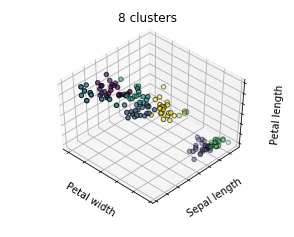

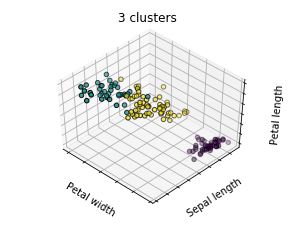

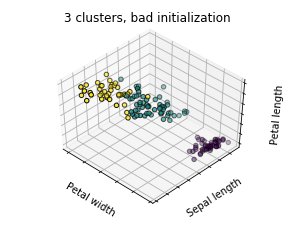

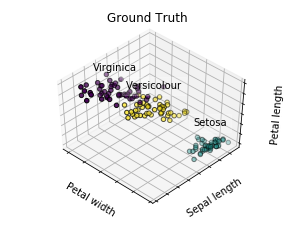

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

np.random.seed(5)

# create three different cluster settings
estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
#     use kmeans to find the clusters
    est.fit(X)
    labels = est.labels_
    
#     plot the clusters
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

plt.show()

<div style="border: 3px solid green; padding: 10px">
<b>Exercise 1:</b> Please create a new dataset with only Setosa and Versicolour iris flowers (i.e. y!=2), 
    and use kmeans to find the two groups of flowers. Check how accuracte the flower groups you find. 
</div>

2. Nerual Networks and Deep Learning
--------------------

**One layer nerual network -- Neuron**

$$y_k = \varphi (\sum_{j=0}^{m}w_{kj}x_j)$$

**The Sigmoid Function**

$$S(t)={\frac {1}{1+e^{-t}}}$$

<img src="../images/neuron.png",width=300,height=300,align="left">



**Backpropagation**

http://www.emergentmind.com/neural-network

**Three types of nerual networks**
1. Standard Nerual Network
<img src="../images/standard_nn.png",width=300,height=300,align="left">
2. Convolutional Nerual Network
<img src="../images/convolutional_nn.png",width=300,height=300,align="left">
3. Recurrent Nerual Network
<img src="../images/recurrent_nn.png",width=300,height=300,align="left">

**Nerual network applications**
<img src="../images/nn_applications.png",width=600,height=600,align="left">

<div style="border: 3px solid green; padding: 10px">
<b>Exercise 2:</b> Please identify which model we should use for the above real-life applications.
</div>

3. MNIST: Hand Written Digits Recognition
------------------------

**Softmax Function: **

$$\sigma (\mathbf {z} )_{j}={\frac {e^{z_{j}}}{\sum _{k=1}^{K}e^{z_{k}}}}    for j = 1, …, K.$$


<img src="../images/digit_recognition_equation.png",width=600,height=600,align="left">
<img src="../images/digit_recognition.png",width=600,height=600,align="left">

In [5]:
import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

# Import data
data_dir = '../datasets'
mnist = input_data.read_data_sets(data_dir, one_hot=True)


Extracting ../datasets/train-images-idx3-ubyte.gz
Extracting ../datasets/train-labels-idx1-ubyte.gz
Extracting ../datasets/t10k-images-idx3-ubyte.gz
Extracting ../datasets/t10k-labels-idx1-ubyte.gz


In [6]:

# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

In [7]:

# The raw formulation of cross-entropy,
#
#   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
#
# can be numerically unstable.
#
# So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
# outputs of 'y', and then average across the batch.
cross_entropy = tf.reduce_mean(
  tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [8]:

# Train
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})


In [9]:

# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))



0.9173


**Deep neurals on recognizing hand written digits**
<img src="./pic/mnist_deep.png",width=400,height=400,align="left">
https://github.com/tensorflow/tensorflow/blob/r1.4/tensorflow/examples/tutorials/mnist/mnist_deep.py

3. Word2Vec
-------------
**The "curse of dimensionality"**

<img src="../images/naive_word_vector.png",width=500,height=500,align="left">

**Word2Vec**

<img src="../images/word2vec.png",width=700,height=700,align="left">


In [1]:

import numpy as np
import os
from sklearn.cluster import MiniBatchKMeans as kmeans


word2vec = {}
datadir = '../datasets/vectors'
for path in os.listdir(datadir):
    iword2vec = {}
    #load the word2vec features.
    with open(os.path.join(datadir,path), 'r') as fin:
        if path == 'vectors0.txt':
            next(fin) #skip information on first line
        for line in fin:
            items = line.replace('\r','').replace('\n','').split(' ')
            if len(items) < 10: continue
            word = items[0]
            vect = np.array([float(i) for i in items[1:] if len(i) > 1])
            iword2vec[word] = vect
    word2vec.update(iword2vec)
    

In [11]:
words = 'staple hammer saw drill'
words = 'math shopping reading science'
words = 'a b c d e f g queen king'

words = words.lower().split()
print (words)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'queen', 'king']


In [12]:

vectlist = []
for word in words: 
    if word not in word2vec: 
        print ('Cannot find word:', word)
    vectlist.append(word2vec[word])
mean = np.array(vectlist).mean(axis=0)

#figure out which is furthest
dists = [np.linalg.norm(v - mean) for v in vectlist]
print ('The distance for each word is:')
for i in range(len(words)):
    print (words[i], dists[i])
print ('The word doesnt belong to the list:', words[np.argmax(dists)])

The distance for each word is:
a 1.93188492197
b 1.70837599271
c 1.67829942755
d 1.7601128295
e 1.67178719587
f 2.28512981092
g 1.82299053392
queen 2.80281833043
king 2.41562834323
The word doesnt belong to the list: queen


<div style="border: 3px solid green; padding: 10px">
<b>Exercise 3:</b> Try to divide the above words into two groups according to their semantic meanings. 
</div>

In [7]:
# Some of the content is borrowed from Andrew Ng's coursera talk on "Nerual Networks and Deep Learning" 
# Some of the content is borrorwe from https://github.com/dhammack/Word2VecExample
# Some of the code is borrowed from Gaël Varoquaux, License: BSD 3 clause
# https://ronxin.github.io/wevi/